 # Práctica Guiada.
 ----
  
  Universidad : UTEC \\
  Curso       : Inteligencia Artificial \\
  Profesor    : Cristian López Del Alamo \\
  Tema        : Regresión Lineal \\
  
 
 ----


Crear el DataSet







In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


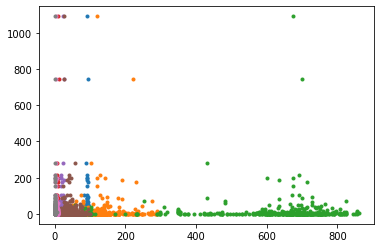

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

dataset = pd.read_csv('/content/drive/MyDrive/ColabNotebooks/forestfires.csv')
in_var = ['FFMC','DMC','DC','ISI','temp','RH','wind','rain']
x = (dataset[in_var]).to_numpy()
y = (dataset[['area']]).to_numpy()

plt.plot(x,y,'.')


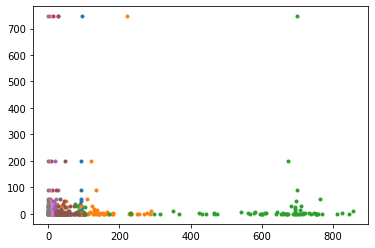

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# TODO: Change to drive path or upload to session
dataset = pd.read_csv('/content/drive/MyDrive/ColabNotebooks/forestfires.csv')

# Used variables
in_var = ['FFMC','DMC','DC','ISI','temp','RH','wind','rain']
out_var = ['area']

# Divide data randomly - 70% / 15% / 15%
training_data, validation_data, test_data = np.split(
      dataset.sample(frac=1, random_state=42),
      [int(0.7 * len(dataset)), int(0.85 * len(dataset))]
    )

x_training = training_data[in_var].to_numpy()
y_training = training_data[out_var].to_numpy()

x_validation = validation_data[in_var].to_numpy()
y_validation = validation_data[out_var].to_numpy()

x_test = test_data[in_var].to_numpy()
y_test = test_data[out_var].to_numpy()

plt.plot(x_validation, y_validation, '.')

# Modelo 
$h(x_i) = x_i*w + b$

In [5]:

def h(x, w, b):
  sum = 0
  for i in range(len(w)):
    sum += x[i] * w[i]
  return sum + b


# Loss function
$\mathcal{L} = \frac{1}{2n}\sum_{i=0}^n (y_i - h(x_i))^2$ 

In [6]:
def Error_MSE(x, y, w, b):
  e =  0.0
  for i in range(len(x)):
    e += (y[i][0] - h(x[i], w, b)) ** 2
  return e / (2 * len(x))

In [7]:
def Error_MAE(x, y, w, b):
  e =  0.0
  for i in range(len(x)):
    e += np.abs((y[i][0] - h(x[i], w, b)))
  return e / (len(x))

# Cálculo de derivadas
$db = \frac{1}{m}\sum_{i=0}^m(y_i - h(x_i))(-1)$

$dw = \frac{1}{m}\sum_{i=0}^m(y_i - h(x_i))(-x_i)$ 

In [8]:

def derivada_MSE(x, y, w, b):
  dws = []
  for j in range(len(w)):
    dw = 0
    for i in range(len(x)):
      dw += (y[i] - h(x[i], w, b))*-x[i][j]
    dw = dw/len(x)
    dws.append(dw) 
  db = 0
  for i in range(len(x)):
    db += (y[i] - h(x[i], w, b))*-1
  db = db/len(x)
  return [db, dws]

In [9]:
def derivada_MAE(x, y, w, b):
  dws = []
  for j in range(len(w)):
    dw = 0
    for i in range(len(x)):
      dw += -x[i][j]
    dw = dw/len(x)
    dws.append(dw)
  db = 0
  for i in range(len(x)):
    db += -1
  db = db/len(x)
  return [db, dws]

# Actualización de parámetros 

$h(x_i) = b + x_i*w $ 

$w  = w - \alpha*\frac{\partial L}{\partial w} $

$b  = b - \alpha*\frac{\partial L}{\partial b} $


In [10]:
def update(w, b, alfa, db, dw):
  for i in range(len(w)):
    w[i] = w[i] - alfa*dw[i]
  b = b - alfa*db
  return b, w

# Training

In [41]:
def train(x, y, alfa, epochs):
    np.random.seed(2001)
    w = np.random.rand(8)
    b = np.random.rand(1)[0]
    L = Error_MAE(x, y, w, b)
    loss = []
    for i in range(epochs):
      db, dw = derivada_MSE(x, y, w, b)
      b, w = update(w, b, alfa, db, dw)
      L = Error_MAE(x, y, w, b)
      #print(w,b,L)
      loss.append(L)
    return b, w, loss


def Plot_Loss(epochs,loss):
   plt.plot(epochs, loss)


# Testing

In [42]:
def test(x,y,w,b):
  e = Error_MAE(x,y,w,b)
  print(e)

def test_validation(x, y, w, b):
  e = Error_MAE(x,y,w,b)
  print(e)

def normalize_x(x):
  return (x - x.min(axis=0) / (x.max(axis=0) - x.min(axis=0)))

In [ ]:
#x = normalize_x(x_training)
y = y_training
x = x_training

for i in [0.000005,0.000001,0.0000005,0.0000001,0.00000005]:
  b, w, loss = train(x, y, i, 1000)
  print("Error promedio para alpha de valor: " + str(i))
  test_validation(x_validation, y_validation, w, b)
  print("Error promedio para alpha de valor: " + str(i))
  test(x_test, y_test, w, b)



Error promedio para alpha de valor: 5e-06
[24.43327531]
Error promedio para alpha de valor: 5e-06
[13.67161125]
Error promedio para alpha de valor: 1e-06
[25.04894513]
Error promedio para alpha de valor: 1e-06
[14.01028843]
